In [1]:
import numpy as np
import pandas as pd
import geopandas
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import abspath
from pathlib import Path

In [2]:
# sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [3]:
fpath = abspath(Path("..\..\data_lfs\italy_municipal_boundaries_2019_shp\Com01012019_WGS84.shp"))

In [4]:
geo_df = geopandas.read_file(fpath)

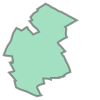

In [5]:
geo_df.loc[0, "geometry"]

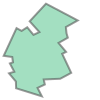

In [14]:
geo_df.loc[0, "geometry"].simplify(0.001)

In [7]:
geo_df.loc[geo_df["COMUNE"] == "Napoli"]

,FID,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,SHAPE_LENG,GlobalID,SHAPE_Le_1,SHAPE_Area,geometry
3903,3904,4,15,63,263,263,63049,063049,Napoli,None,1,111372.177741,{4BB0E200-7AE7-417C-A9CD-93223603720B},1.173131,1.189441e+08,"MULTIPOLYGON (((14.15921 40.80804, 14.15923 40..."


In [8]:
campania_df = geo_df.loc[geo_df["COD_REG"] == 15]
campania_df.head(2)

,FID,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,SHAPE_LENG,GlobalID,SHAPE_Le_1,SHAPE_Area,geometry
320,321,4,15,64,0,64,64083,064083,San Martino Valle Caudina,None,0,27807.908930,{7D0D0680-C6DC-4861-B9D4-295FA89E64B3},0.287589,2.291533e+07,"POLYGON ((14.67520 41.05432, 14.67627 41.05421..."
321,322,4,15,64,0,64,64084,064084,San Michele di Serino,None,0,11269.471361,{E0354628-EFEE-4553-A15B-15ACE1728DA0},0.117192,4.465928e+06,"POLYGON ((14.84527 40.88822, 14.84473 40.88774..."


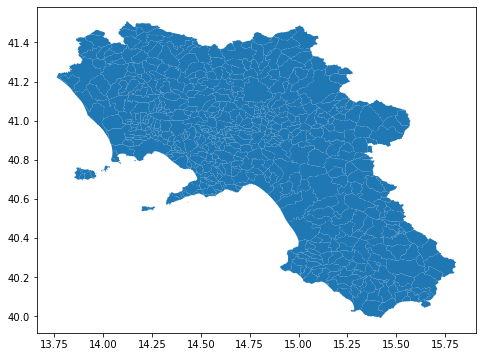

In [9]:
campania_df.plot()

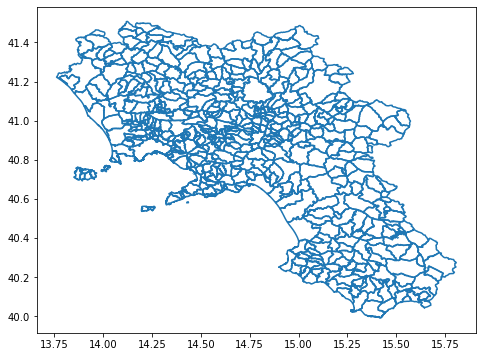

In [10]:
campania_df.boundary.plot()

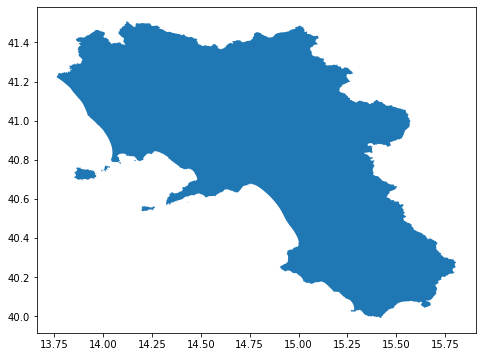

In [11]:
# https://stackoverflow.com/questions/40385782/make-a-union-of-polygons-in-geopandas-or-shapely-into-a-single-geometry
u = geopandas.GeoSeries(campania_df["geometry"].unary_union)
u.plot()

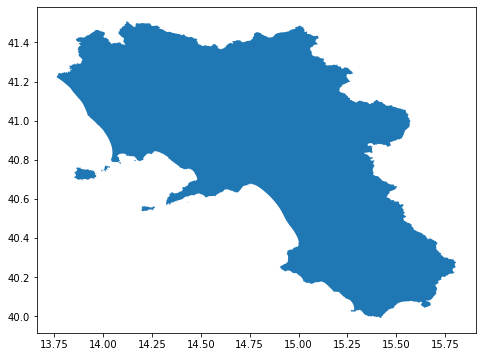

In [12]:
campania_df.dissolve(by="COD_REG").plot()

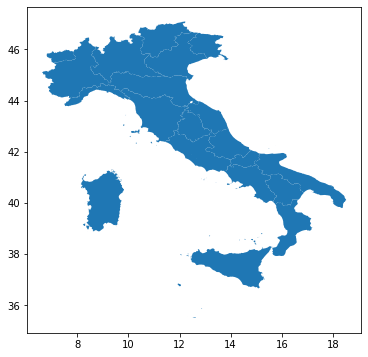

In [13]:
geo_df.dissolve(by="COD_REG").plot()

In [15]:
# geo_df.dissolve(by="COD_REG").to_file('italy.geojson', driver='GeoJSON')

In [17]:
regions_df = geo_df.dissolve(by="COD_REG")

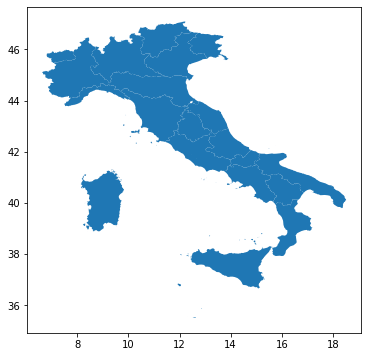

In [41]:
regions_light_df = regions_df.simplify(0.005)
regions_light_df.plot()

In [42]:
regions_light_df.to_file('italy_regions_light.geojson', driver='GeoJSON')